#Customer Segmentation

##Introduction
A dataset of credit card customers' behavior (from [kaggle.com](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)) is used to classify customers into groups, needed for marketing strategy. **Customer segmentation is an example of unsupervised learning**, performed using K-means clustering method.The customer group number is added to the final dataset. 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('/content/creditcarddata.csv')

##Data Preprocessing

In [ ]:
dataset.head()
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Create a dataset with relevant variables, e.g. `customer_id` is not useful for classification and is dropped.**

In [ ]:
#categorical column
dataset.select_dtypes(include='object').columns

Index(['CUST_ID'], dtype='object')

In [ ]:
#numerical columns
dataset.select_dtypes(include=['int64','float64']).columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Check for null values**

In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.isnull().values.sum()

314

In [ ]:
dataset.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

**Since the number of null values is small, we can remove entries with null values**

In [ ]:
#filling na by mean
#dataset['MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS']).mean()
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
#Remove ID variable
dataset = dataset.drop(columns='CUST_ID')

In [ ]:
#Check correlation
corr=dataset.corr()

Overall, the variables show small correlations except on some cases such as payments and purchases, which is expected. Therefore, we can use this data for further analysis.

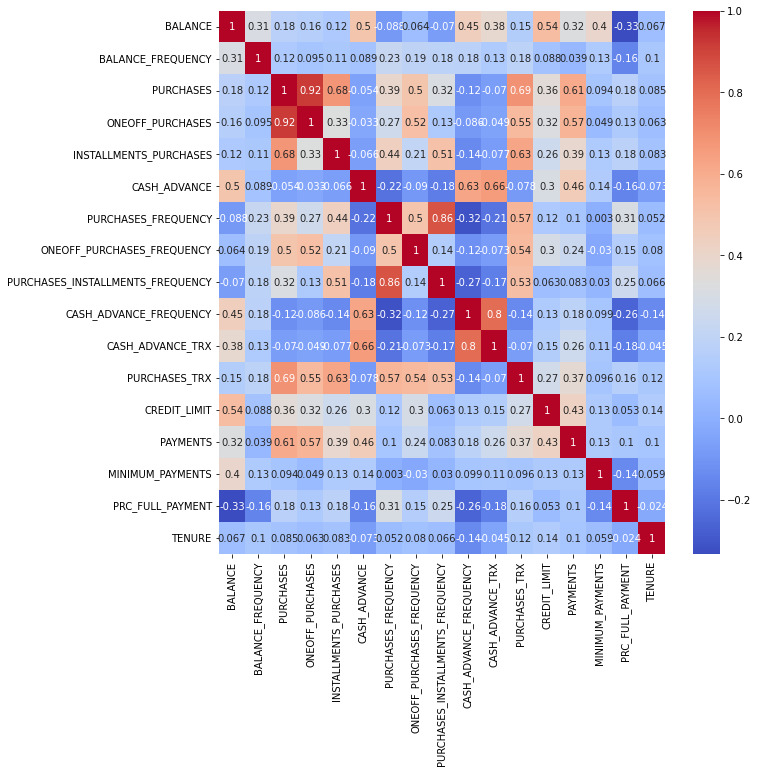

In [ ]:
#plot corr
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr,annot=True, cmap='coolwarm')

##K-Means Clustering

In [ ]:
from copy import deepcopy
#Create train test dataset
#No Targe Variable Present

#Feature Scaling
df = dataset.copy()

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc      = StandardScaler()
dataset = sc.fit_transform(dataset)

In [ ]:
#Finding Clustered data 
from sklearn.cluster import KMeans

Since we do not know the ideal number of groups in which we can classify customers, we scan `n_clusters` and check the sum of squared distances within the groups. Using elbow method, we determine the ideal number of clusters where sum of squares plateau (see plot below).

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i,init='k-means++') #initialization=km++
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)#inertia_ = sum squared distances calculated 

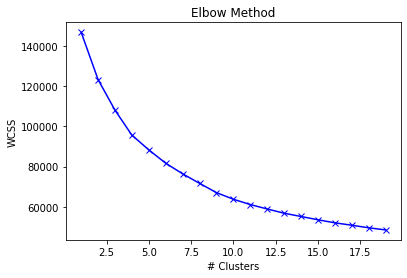

In [ ]:
plt.plot(range(1,20), wcss,'bx-')
plt.title('Elbow Method')
plt.xlabel('# Clusters')
plt.ylabel('WCSS') #Within clusters Sum of Squares
plt.show()

**Classify using `n_clusters=8`**

In [ ]:
# Build a Model for finding ~8 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=0)

**Use the model to classify each customer in the dataset**

In [ ]:
# Determine Dependent Variable 
y_means = kmeans.fit_predict(dataset)

In [ ]:
y_means

array([2, 0, 1, ..., 7, 7, 7], dtype=int32)

In [ ]:
y_means = y_means.reshape(len(y_means),1)
b = np.concatenate((y_means,df), axis=1)

In [ ]:
df_final = pd.DataFrame(data=b,columns=['Cluster#','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])


##Final Dataset
Final dataset created using original data and addition of customer classification (`Cluster#`) to the table.

In [ ]:
df_final.head()

,Cluster#,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,0.0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,1.0,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,2.0,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
4,1.0,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0
